In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("results/perlmutter/results.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup
0,1024,26075.313754,"[23.46285958500812, 24.98286917002406, 23.8725...",0.613515,48.946118,lazy,tensorflow,16,10,78.332173
1,1024,75976.072964,"[71.20515765302116, 71.29346780700143, 71.3754...",0.455495,122.186891,file_system,tensorflow,16,10,0.004009
2,1024,12049.150416,"[14.354596584977116, 14.398935119970702, 14.58...",0.431667,66.616406,conda_pack,tensorflow,16,10,154.916764
3,1024,23091.081846,"[12.71142842801055, 12.985944583022501, 12.781...",0.596340,41.702482,lazy,tensorflow,16,0,46.592275
4,1024,43498.181368,"[4.961286707024556, 5.028521177009679, 5.03124...",0.416571,111.452963,file_system,tensorflow,16,0,0.002724
...,...,...,...,...,...,...,...,...,...,...
583,8,80.731039,"[10.086286231991835, 10.086895045998972, 10.08...",0.007391,11.888772,file_system,numpy,8,10,0.001454
584,8,80.476865,"[10.04699319601059, 10.055880993022583, 10.055...",0.007042,18.474902,conda_pack,numpy,8,10,56.357462
585,8,2.213651,"[0.21409295999910682, 0.23427177197299898, 0.2...",0.013860,4.346782,lazy,numpy,8,0,1.992409
586,8,1.806876,"[0.22730513795977458, 0.2266988240298815, 0.22...",0.007334,3.256876,file_system,numpy,8,0,0.001453


In [3]:
results["avg_time"] = results["times"].apply(lambda x: np.mean(x))
results["total_time"] = results["end_time"] + results["setup"]
results["tasks_per_node"] = results["ntasks"] / results["nodes"]
results.head()

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,avg_time,total_time,tasks_per_node
0,1024,26075.313754,"[23.46285958500812, 24.98286917002406, 23.8725...",0.613515,48.946118,lazy,tensorflow,16,10,78.332173,25.464174,127.278291,64.0
1,1024,75976.072964,"[71.20515765302116, 71.29346780700143, 71.3754...",0.455495,122.186891,file_system,tensorflow,16,10,0.004009,74.195384,122.190899,64.0
2,1024,12049.150416,"[14.354596584977116, 14.398935119970702, 14.58...",0.431667,66.616406,conda_pack,tensorflow,16,10,154.916764,11.766748,221.533170,64.0
3,1024,23091.081846,"[12.71142842801055, 12.985944583022501, 12.781...",0.596340,41.702482,lazy,tensorflow,16,0,46.592275,22.549885,88.294757,64.0
4,1024,43498.181368,"[4.961286707024556, 5.028521177009679, 5.03124...",0.416571,111.452963,file_system,tensorflow,16,0,0.002724,42.478693,111.455687,64.0


In [24]:
conda_pack_results = results[results["method"] == "conda_pack"]
conda_pack_results[conda_pack_results["module"] == "numpy"]["setup"].mean()

59.54166381069214

In [25]:
conda_pack_results = results[results["method"] == "conda_pack"]
conda_pack_results[conda_pack_results["module"] == "tensorflow"]["setup"].mean()

144.18701301221986

In [26]:
lazy_results = results[results["method"] == "lazy"]
lazy_results[lazy_results["module"] == "numpy"]["setup"].mean()

2.1030216266173034

In [27]:
lazy_results = results[results["method"] == "lazy"]
lazy_results[lazy_results["module"] == "tensorflow"]["setup"].mean()

23.10145069810215

In [2]:
def plot_time_vs_tasks(nodes=1, modules=["numpy", "tensorflow"], y="avg_time", sleep=10, method = None):
    for i, module in enumerate(modules):
        df = results[results["nodes"] == nodes]
        df = df[df["sleep"] == sleep]
        df = df[df["module"] == module]
        if method is not None:
            df = df[df["method"] == method]
        
        plt.subplot(1, len(modules), i+1) 
        sns.barplot(data=df, x="ntasks", y=y, hue="method")
        plt.title(f"Module: {module}")
        
    plt.gcf().suptitle(f"{y} for nodes: {nodes}")
    plt.tight_layout()
    
def plot_time_vs_nodes(tasks=64, modules=["numpy", "tensorflow"], y="avg_time", sleep=10, method = None):
    for i, module in enumerate(modules):
        df = results[results["tasks_per_node"] == tasks]
        df = df[df["sleep"] == sleep]
        df = df[df["module"] == module]
        if method is not None:
            df = df[df["method"] == method]
        
        plt.subplot(1, len(modules), i+1) 
        sns.barplot(data=df, x="nodes", y=y, hue="method")
        plt.title(f"{module}", fontsize=20)
        
    f = plt.gcf()
#     f.suptitle(f"Total time to run {tasks} tasks per node", fontsize=20)
    f.set_figwidth(8)
    f.set_figheight(3)

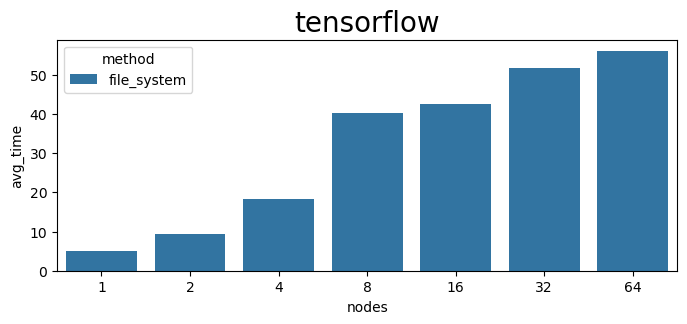

In [12]:
plot_time_vs_nodes(64, modules=["tensorflow"], sleep=0, method="file_system")
plt.savefig("demo_import.pdf", bbox_inches="tight")

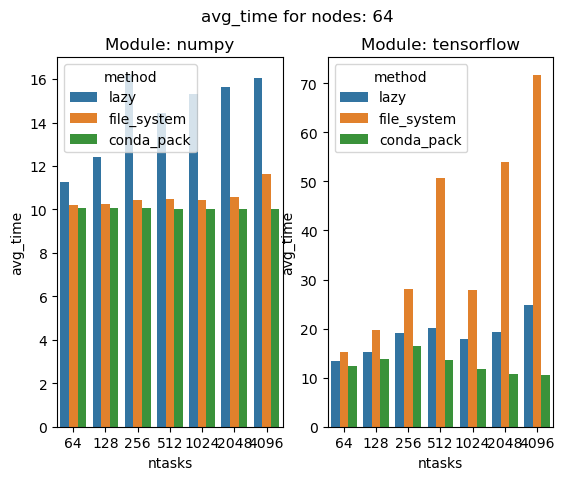

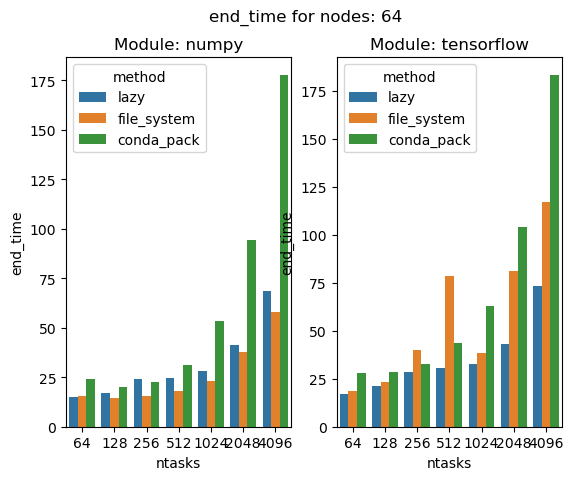

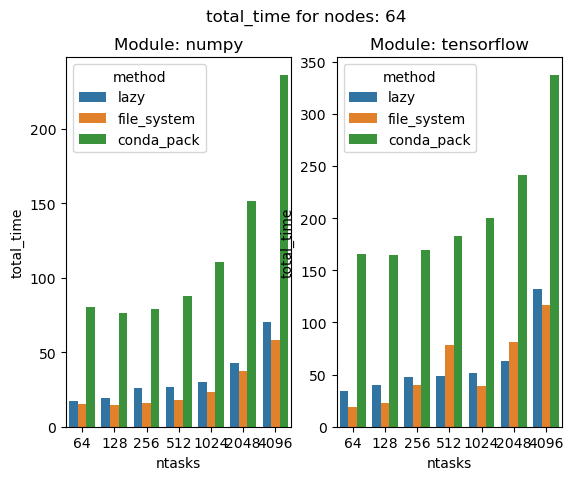

In [11]:
plot_time_vs_tasks(64)
plt.show()
plot_time_vs_tasks(64, y="end_time")
plt.show()
plot_time_vs_tasks(64, y="total_time")
plt.show()

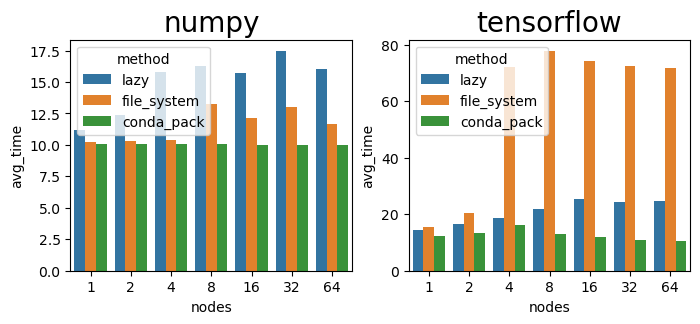

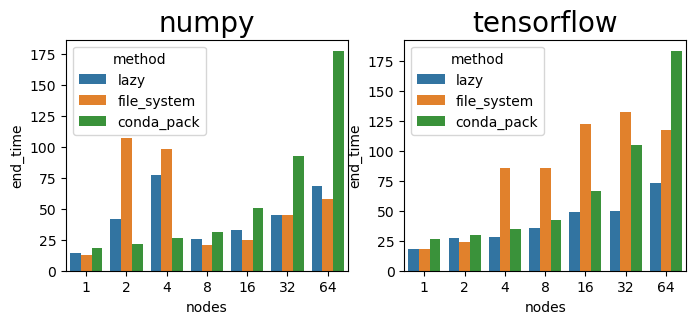

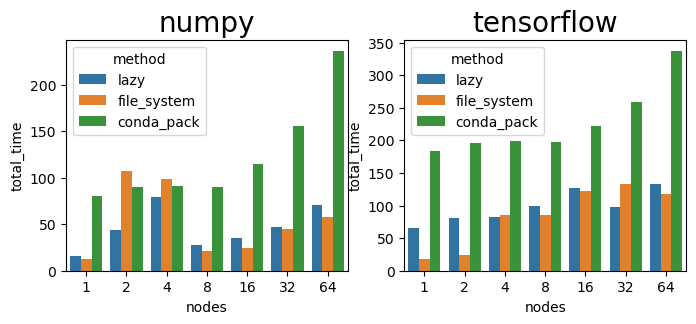

In [9]:
plot_time_vs_nodes(64, sleep=10)
plt.show()
plot_time_vs_nodes(64, y="end_time", sleep=10)
plt.savefig("figs/perlmutter_import_sleep_10.pdf", bbox_inches="tight")
plt.show()
plot_time_vs_nodes(64, y="total_time", sleep=10)
plt.show()

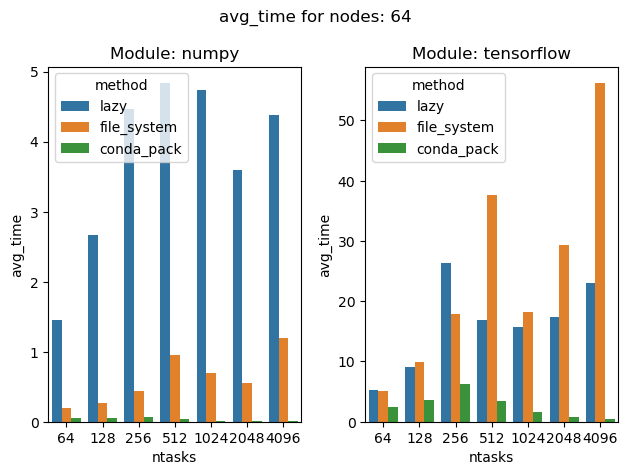

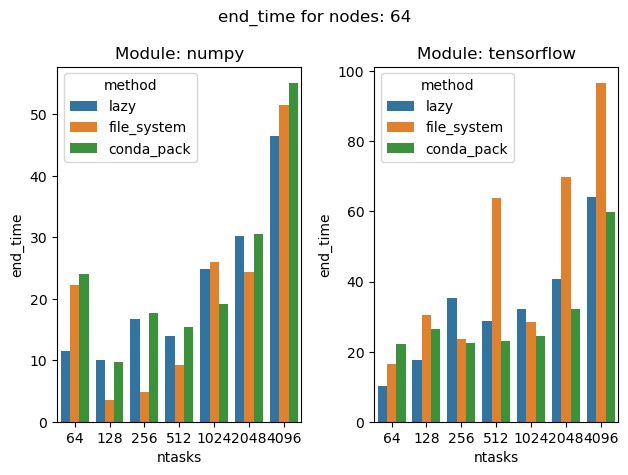

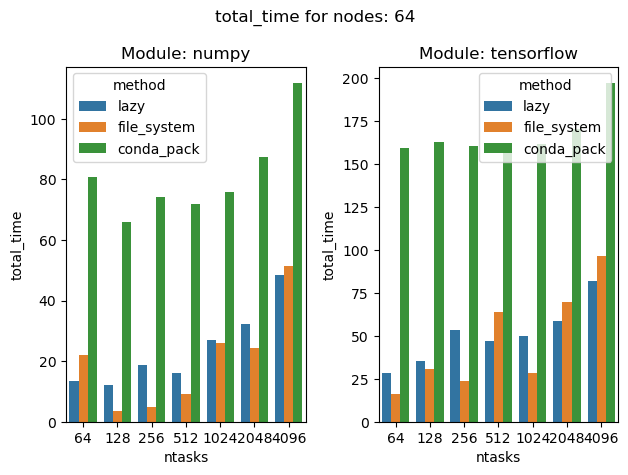

In [7]:
plot_time_vs_tasks(64, sleep=0)
plt.show()
plot_time_vs_tasks(64, y="end_time", sleep=0)
plt.show()
plot_time_vs_tasks(64, y="total_time", sleep=0)
plt.show()

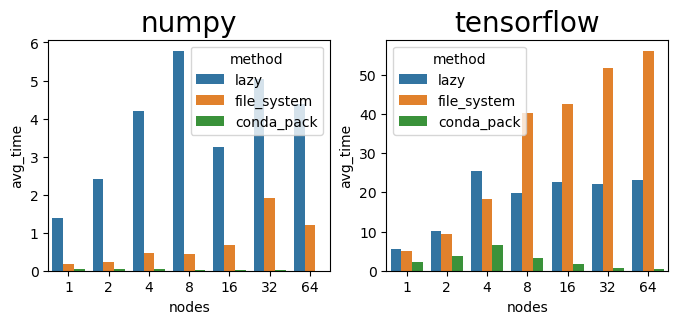

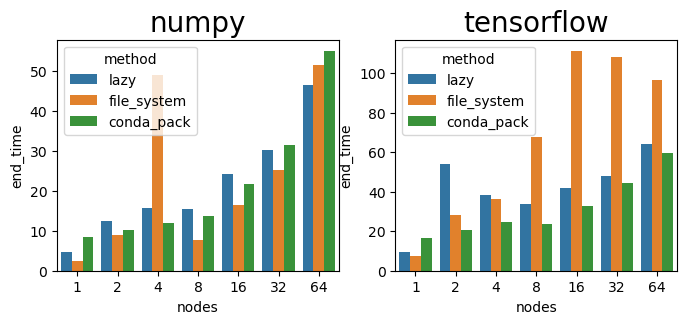

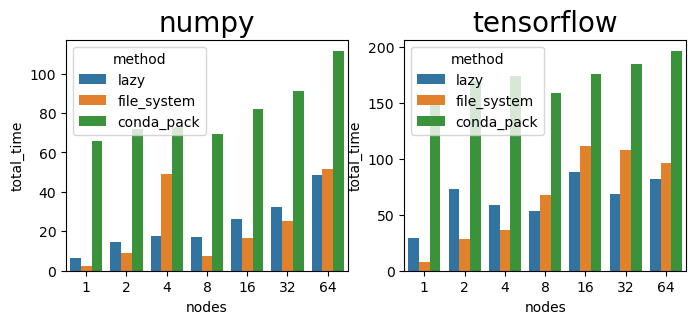

In [10]:
plot_time_vs_nodes(64, sleep=0)
plt.show()
plot_time_vs_nodes(64, y="end_time", sleep=0)
plt.savefig("figs/perlmutter_import_sleep_0.pdf", bbox_inches="tight")
plt.show()
plot_time_vs_nodes(64, y="total_time", sleep=0)
plt.show()

In [14]:
with open("results/perlmutter/results-simulated.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,package_size
0,4096,13411.417200,"[1.9355399399937596, 1.978690504009137, 2.0278...",1.768655,60.686197,lazy,sim_pack,64,0,5.512988,3
1,4096,79027.639175,"[11.596516666002572, 11.550000698014628, 11.59...",1.731617,66.572963,file_system,sim_pack,64,0,0.001416,3
2,4096,611.931150,"[1.6155969399842434, 1.6191201219917275, 1.617...",1.758430,57.579358,conda_pack,sim_pack,64,0,78.760177,3
3,4096,20630.357789,"[0.34214787400560454, 0.3435316260147374, 0.35...",1.743197,56.020622,lazy,sim_pack,64,0,10.269810,6
4,4096,151345.785506,"[19.740995058004046, 19.662548886990407, 19.59...",1.797641,76.202780,file_system,sim_pack,64,0,0.001727,6
5,4096,1344.476893,"[4.416789002018049, 4.420643830002518, 4.41752...",1.861285,57.282606,conda_pack,sim_pack,64,0,79.793701,6
6,4096,31398.609281,"[0.25856026998371817, 0.30149046500446275, 0.2...",1.752799,51.248822,lazy,sim_pack,64,0,15.242306,9
7,4096,181543.594038,"[35.186836124019464, 35.200170031021116, 35.20...",1.779805,79.487624,file_system,sim_pack,64,0,0.001872,9
8,4096,2565.441812,"[8.965489411988528, 8.973565766995307, 8.97495...",1.712653,57.621760,conda_pack,sim_pack,64,0,101.535136,9
9,4096,37388.486521,"[0.4298054160026368, 0.4305210029997397, 0.473...",1.986052,52.078695,lazy,sim_pack,64,0,20.309409,12


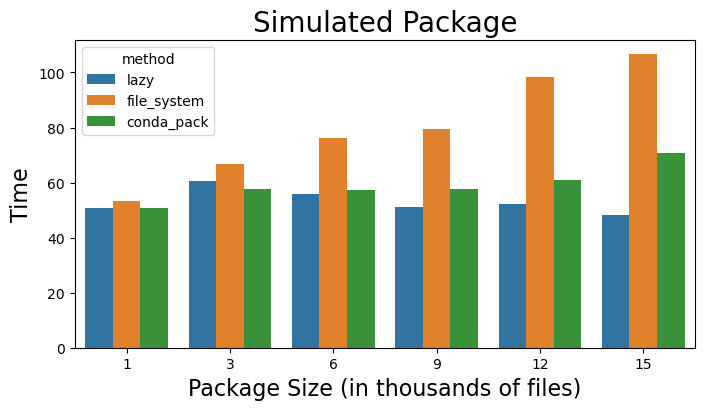

In [15]:
sns.barplot(data=results, x="package_size", y="end_time", hue="method")
plt.title(f"Simulated Package", fontsize=20)
plt.xlabel(f"Package Size (in thousands of files)", fontsize=16)
plt.ylabel(f"Time", fontsize=16)
f = plt.gcf()
f.set_figwidth(8)
f.set_figheight(4)
plt.savefig("figs/perlmutter_simulated_package.pdf", bbox_inches="tight")

In [20]:
with open("results/perlmutter/xtb_results.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results

,method,nodes,initial,count,batch,time
0,lazy,64,4096,16384,4096,76.567775
1,file_system,64,4096,16384,4096,77.255843
2,lazy,64,4096,16384,4096,71.120564
3,file_system,64,4096,16384,4096,61.999371
4,lazy,64,4096,16384,4096,72.874247
5,file_system,64,4096,16384,4096,64.936000
6,lazy,64,4096,16384,4096,99.371140
7,file_system,64,4096,16384,4096,62.403770
8,lazy,64,4096,16384,4096,74.141615
9,file_system,64,4096,16384,4096,71.000000


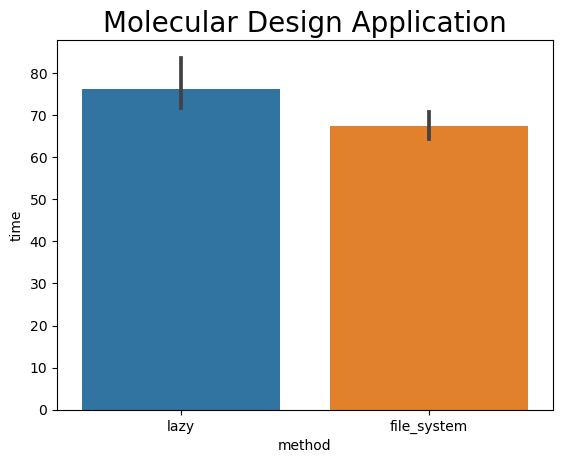

In [21]:
sns.barplot(data=results, x="method", y="time")
plt.title(f"Molecular Design Application", fontsize=20)
f.set_figwidth(4)
f.set_figheight(4)
plt.savefig("figs/perlmutter_mol_design.pdf", bbox_inches="tight")

In [13]:
speedup = results[results["method"] == "file_system"]["time"].mean() / results[results["method"] == "lazy"]["time"].mean() 
print("Overall Speedup: ", speedup)

Overall Speedup:  0.8829595735741934


In [3]:
with open("results/results-64.jsonl") as fp:
    lines = fp.readlines()
experiments = [json.loads(line) for line in lines]
results = pd.DataFrame.from_records(experiments)
results_file = results[results["connector"] == "file"]
results = results[results["method"] != "lazy"]
results = pd.concat((results, results_file))
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,connector
0,4096,10007.953524,"[0.17542494799999986, 0.17619104600453284, 4.7...",1.757255,48.291239,file_system,numpy,64,0,0.003774,redis
1,4096,13.577627,"[0.05136965699784923, 0.05035313600092195, 0.0...",1.905918,56.988960,conda_pack,numpy,64,0,82.515691,redis
2,4096,61367.425146,"[10.111164603004, 10.1260094140016, 10.1262935...",1.805744,69.033637,file_system,numpy,64,10,0.002993,redis
3,4096,41013.568111,"[10.059683644998586, 10.060284503997536, 10.06...",1.874762,171.478352,conda_pack,numpy,64,10,56.899398,redis
4,4096,226986.356709,"[6.702488586990512, 6.739903374997084, 6.73957...",1.746531,99.613851,file_system,tensorflow,64,0,0.003889,redis
...,...,...,...,...,...,...,...,...,...,...,...
105,64,646.469293,"[10.054063702002168, 10.05566201399779, 10.056...",0.038747,13.572686,lazy,numpy,64,10,1.546784,file
106,64,111.733748,"[1.4872868960010237, 1.5858587100010482, 1.539...",0.042646,21.292871,lazy,tensorflow,64,0,16.208071,file
107,64,814.350131,"[12.454296023002826, 12.454063105004025, 12.18...",0.042050,16.577228,lazy,tensorflow,64,10,16.697932,file
108,4096,7243.520628,"[1.1451508159952937, 1.0529323869996006, 1.052...",1.879500,53.390907,lazy,numpy,64,0,3.976038,file


In [4]:
results["avg_time"] = results["times"].apply(lambda x: np.mean(x))
results["total_time"] = results["end_time"] + results["setup"]
results["tasks_per_node"] = results["ntasks"] / results["nodes"]
results

,ntasks,cumulative_time,times,launch_time,end_time,method,module,nodes,sleep,setup,connector,avg_time,total_time,tasks_per_node
0,4096,10007.953524,"[0.17542494799999986, 0.17619104600453284, 4.7...",1.757255,48.291239,file_system,numpy,64,0,0.003774,redis,2.443348,48.295013,64.0
1,4096,13.577627,"[0.05136965699784923, 0.05035313600092195, 0.0...",1.905918,56.988960,conda_pack,numpy,64,0,82.515691,redis,0.003315,139.504652,64.0
2,4096,61367.425146,"[10.111164603004, 10.1260094140016, 10.1262935...",1.805744,69.033637,file_system,numpy,64,10,0.002993,redis,14.982282,69.036630,64.0
3,4096,41013.568111,"[10.059683644998586, 10.060284503997536, 10.06...",1.874762,171.478352,conda_pack,numpy,64,10,56.899398,redis,10.013078,228.377750,64.0
4,4096,226986.356709,"[6.702488586990512, 6.739903374997084, 6.73957...",1.746531,99.613851,file_system,tensorflow,64,0,0.003889,redis,55.416591,99.617739,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,64,646.469293,"[10.054063702002168, 10.05566201399779, 10.056...",0.038747,13.572686,lazy,numpy,64,10,1.546784,file,10.101083,15.119470,1.0
106,64,111.733748,"[1.4872868960010237, 1.5858587100010482, 1.539...",0.042646,21.292871,lazy,tensorflow,64,0,16.208071,file,1.745840,37.500942,1.0
107,64,814.350131,"[12.454296023002826, 12.454063105004025, 12.18...",0.042050,16.577228,lazy,tensorflow,64,10,16.697932,file,12.724221,33.275160,1.0
108,4096,7243.520628,"[1.1451508159952937, 1.0529323869996006, 1.052...",1.879500,53.390907,lazy,numpy,64,0,3.976038,file,1.768438,57.366944,64.0


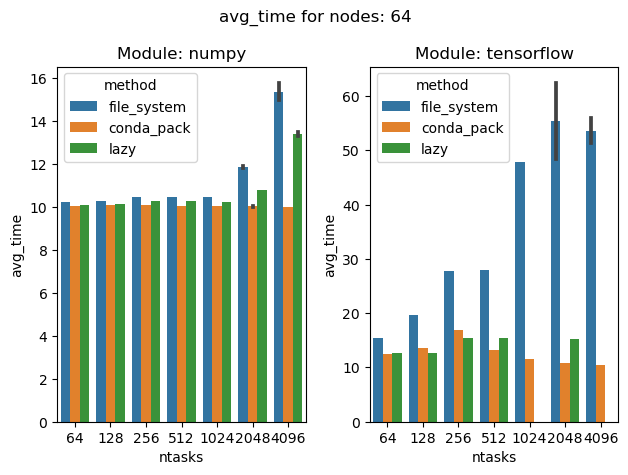

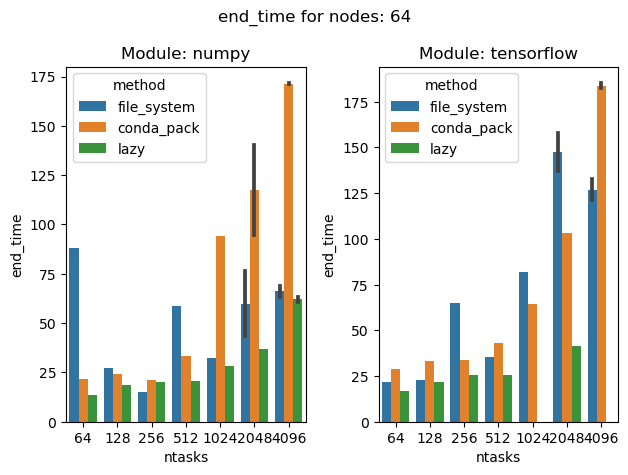

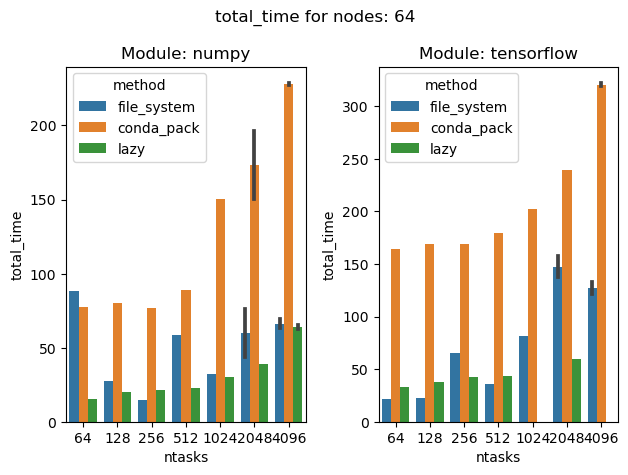

In [5]:
plot_time_vs_tasks(64)
plt.show()
plot_time_vs_tasks(64, y="end_time")
plt.show()
plot_time_vs_tasks(64, y="total_time")
plt.show()

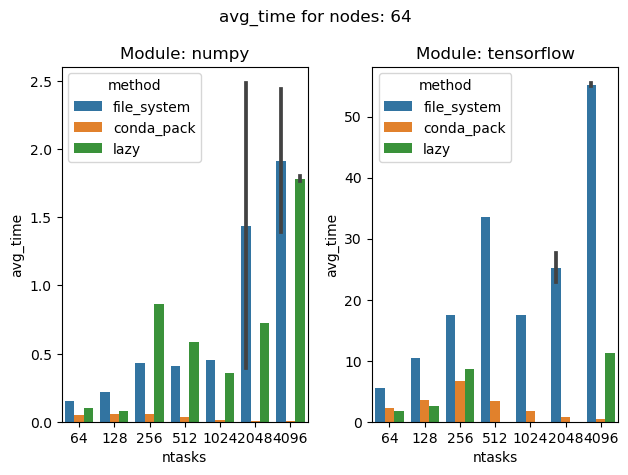

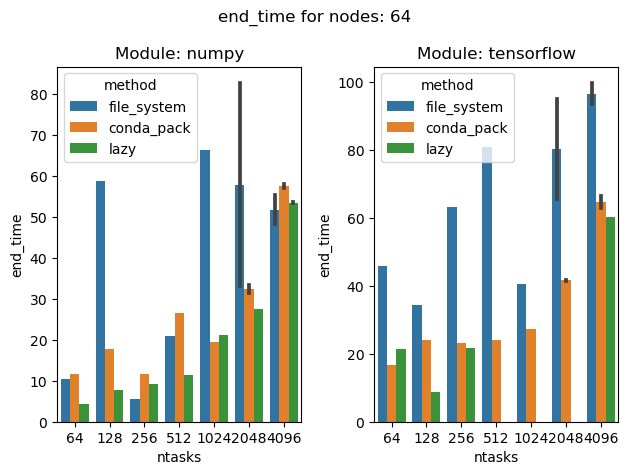

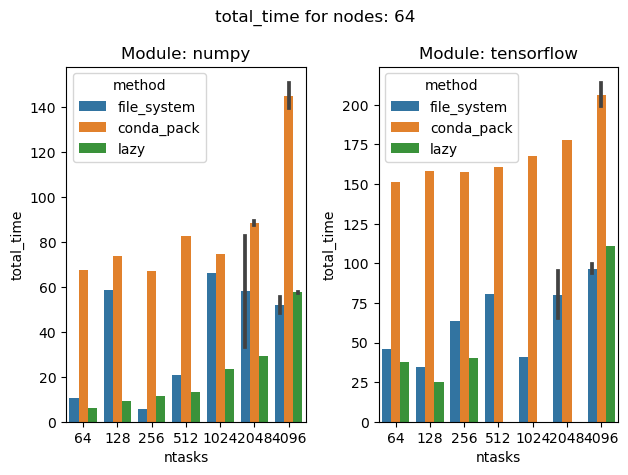

In [6]:
plot_time_vs_tasks(64, sleep=0)
plt.show()
plot_time_vs_tasks(64, y="end_time", sleep=0)
plt.show()
plot_time_vs_tasks(64, y="total_time", sleep=0)
plt.show()